Average for POI 1: 4.5488561480997465
Average for POI 3: 5.358543761808025
Average for POI 4: 12.736570582487365
Standard Deviation for POI 1: 4.665710716057866
Standard Deviation for POI 3: 3.0491921142074396
Standard Deviation for POI 4: 35.57575156285909
Radius for POI 1: 24.85193722989386
Radius for POI 3: 20.155377791591437
Radius for POI 4: 192.7049913074258
[0.042692126819973905, 0.8615604816414099, 0.015002401843176624, 0.025108194381616]
Average for POI 1 after Removing Outliers: 0.8396433393976431
Average for POI 3 after Removing Outliers: 3.859638286527356
Average for POI 4 after Removing Outliers: 4.581379300887481
Standard Deviation for POI 1 after Removing Outliers: 0.6283317860079088
Standard Deviation for POI 3 after Removing Outliers: 0.49588908478619276
Standard Deviation for POI 4 after Removing Outliers: 0.3787284324332966


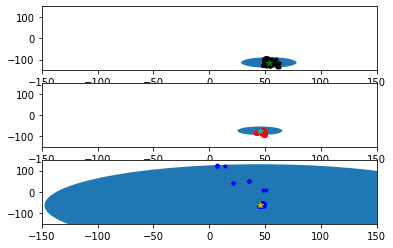

In [19]:
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

#Load the Dataset
df = pd.read_csv(os.path.expanduser('C:/Users/jeett/Desktop/EQWorks/data/DataSample.csv'))
df_poi = pd.read_csv(os.path.expanduser('C:/Users/jeett/Desktop/EQWorks/data/POIList.csv'))

#1. Cleaning the data
data = df.values.tolist()
poi = df_poi.values.tolist()
latitude = df['Latitude'].values.tolist()
longitude = df['Longitude'].values.tolist()
geoinfo = []

for i in range(0,len(latitude)):
    geoinfo.append([latitude[i],longitude[i]])
    
unique_geoinfo = []
processed_data = []

for i in range(0,len(geoinfo)):
    if geoinfo[i] not in unique_geoinfo:
        unique_geoinfo.append(geoinfo[i])
        processed_data.append(data[i])

#2. Assigning the Label
results = []
dist_fromPOI1 = []
dist_fromPOI3 = []
dist_fromPOI4 = []

idx_fromPOI1 = []
idx_fromPOI3 = []
idx_fromPOI4 = []

for i in range(0,len(unique_geoinfo)):
    dis1 = math.sqrt((unique_geoinfo[i][0] - poi[0][1])**2+(unique_geoinfo[i][1] - poi[0][2])**2)
    dis3 = math.sqrt((unique_geoinfo[i][0] - poi[2][1])**2+(unique_geoinfo[i][1] - poi[2][2])**2)
    dis4 = math.sqrt((unique_geoinfo[i][0] - poi[3][1])**2+(unique_geoinfo[i][1] - poi[3][2])**2)
    
    min_distance = min(dis1,dis3,dis4)
    if(min_distance == dis1):
        results.append('POI 1')
        dist_fromPOI1.append(dis1)
        idx_fromPOI1.append(i)
    elif(min_distance == dis3):
        results.append('POI 3')
        dist_fromPOI3.append(dis3)
        idx_fromPOI3.append(i)
    elif(min_distance == dis4):
        results.append('POI 4')
        dist_fromPOI4.append(dis4)
        idx_fromPOI4.append(i)

#3. Analysis
avg_POI1 = np.mean(dist_fromPOI1)
avg_POI3 = np.mean(dist_fromPOI3)
avg_POI4 = np.mean(dist_fromPOI4)

std_POI1 = np.std(dist_fromPOI1)
std_POI3 = np.std(dist_fromPOI3)
std_POI4 = np.std(dist_fromPOI4)

print("Average for POI 1: " + str(avg_POI1))
print("Average for POI 3: " + str(avg_POI3))
print("Average for POI 4: " + str(avg_POI4))

print("Standard Deviation for POI 1: " + str(std_POI1))
print("Standard Deviation for POI 3: " + str(std_POI3))
print("Standard Deviation for POI 4: " + str(std_POI4))

rad1 = max(dist_fromPOI1)
rad3 = max(dist_fromPOI3)
rad4 = max(dist_fromPOI4)

print("Radius for POI 1: " + str(rad1))
print("Radius for POI 3: " + str(rad3))
print("Radius for POI 4: " + str(rad4))


figure, axis = plt.subplots(3)

for i in range(len(results)):
    if(results[i] == 'POI 1'):
        axis[0].plot(unique_geoinfo[i][0],unique_geoinfo[i][1],'.',color = 'black')
    elif(results[i] == 'POI 3'):
        axis[1].plot(unique_geoinfo[i][0],unique_geoinfo[i][1],'.',color = 'r')
    elif(results[i] == 'POI 4'):
        axis[2].plot(unique_geoinfo[i][0],unique_geoinfo[i][1],'.',color = 'b')

axis[0].plot(poi[0][1],poi[0][2],'*',color = 'g')
axis[1].plot(poi[2][1],poi[2][2],'*',color = 'c')
axis[2].plot(poi[3][1],poi[3][2],'*',color = 'y')

circle1 = plt.Circle((poi[0][1], poi[0][2]), rad1)
axis[0].add_artist(circle1)
axis[0].set(xlim=(-150, 150), ylim = (-150, 150))

circle3 = plt.Circle((poi[2][1], poi[2][2]), rad3)
axis[1].add_artist(circle3)
axis[1].set(xlim=(-150, 150), ylim = (-150, 150))

circle4 = plt.Circle((poi[3][1], poi[3][2]), rad4)
axis[2].add_artist(circle4)
axis[2].set(xlim=(-150, 150), ylim = (-150, 150))


#4. Building the Model
unique_geoinfo.append([poi[3][1],poi[3][2]])
unique_geoinfo.append([poi[2][1],poi[2][2]])
unique_geoinfo.append([poi[0][1],poi[0][2]])

minmax_scale = preprocessing.MinMaxScaler(feature_range=(-10, 10))
rescaled_unique_geoinfo = minmax_scale.fit_transform(unique_geoinfo)

rescaled_poi = []
rescaled_poi.append(rescaled_unique_geoinfo[-1])
rescaled_poi.append(rescaled_unique_geoinfo[-2])
rescaled_poi.append(rescaled_unique_geoinfo[-3])

unique_geoinfo.pop(-1)
unique_geoinfo.pop(-1)
unique_geoinfo.pop(-1)

rescaled_unique_geoinfo_withoutOutliers = []
rescaled_results_withoutOutliers = []
dist_fromPOI1_withoutOutliers = []
dist_fromPOI3_withoutOutliers = []
dist_fromPOI4_withoutOutliers = []

q75,q25 = np.percentile(dist_fromPOI1,[75,25])
intr_qr = q75-q25
u_lim = q75+(1.5*intr_qr)
l_lim = q25-(1.5*intr_qr)

for i in range(len(dist_fromPOI1)):
    if(dist_fromPOI1[i] < u_lim or dist_fromPOI1[i] > l_lim):
        rescaled_unique_geoinfo_withoutOutliers.append(rescaled_unique_geoinfo[idx_fromPOI1[i]])
        rescaled_results_withoutOutliers.append(results[idx_fromPOI1[i]])
        dis = math.sqrt((rescaled_unique_geoinfo_withoutOutliers[i][0] - rescaled_poi[0][0])**2+(rescaled_unique_geoinfo_withoutOutliers[i][1] - rescaled_poi[0][1])**2)
        dist_fromPOI1_withoutOutliers.append(dis)

q75,q25 = np.percentile(dist_fromPOI3,[75,25])
intr_qr = q75-q25
u_lim = q75+(1.5*intr_qr)
l_lim = q25-(1.5*intr_qr)

for i in range(len(dist_fromPOI3)):
    if(dist_fromPOI3[i] < u_lim or dist_fromPOI3[i] > l_lim):
        rescaled_unique_geoinfo_withoutOutliers.append(rescaled_unique_geoinfo[idx_fromPOI3[i]])
        rescaled_results_withoutOutliers.append(results[idx_fromPOI3[i]])
        dis = math.sqrt((rescaled_unique_geoinfo_withoutOutliers[i][0] - rescaled_poi[1][0])**2+(rescaled_unique_geoinfo_withoutOutliers[i][1] - rescaled_poi[1][1])**2)
        dist_fromPOI3_withoutOutliers.append(dis)
        
q75,q25 = np.percentile(dist_fromPOI4,[75,25])
intr_qr = q75-q25
u_lim = q75+(1.5*intr_qr)
l_lim = q25-(1.5*intr_qr)

for i in range(len(dist_fromPOI4)):
    if(dist_fromPOI4[i] < u_lim or dist_fromPOI4[i] > l_lim):
        rescaled_unique_geoinfo_withoutOutliers.append(rescaled_unique_geoinfo[idx_fromPOI4[i]])
        rescaled_results_withoutOutliers.append(results[idx_fromPOI4[i]])
        dis = math.sqrt((rescaled_unique_geoinfo_withoutOutliers[i][0] - rescaled_poi[2][0])**2+(rescaled_unique_geoinfo_withoutOutliers[i][1] - rescaled_poi[2][1])**2)
        dist_fromPOI4_withoutOutliers.append(dis)
        
avg_POI1 = np.mean(dist_fromPOI1_withoutOutliers)
avg_POI3 = np.mean(dist_fromPOI3_withoutOutliers)
avg_POI4 = np.mean(dist_fromPOI4_withoutOutliers)

std_POI1 = np.std(dist_fromPOI1_withoutOutliers)
std_POI3 = np.std(dist_fromPOI3_withoutOutliers)
std_POI4 = np.std(dist_fromPOI4_withoutOutliers)

print("Average for POI 1 after Removing Outliers: " + str(avg_POI1))
print("Average for POI 3 after Removing Outliers: " + str(avg_POI3))
print("Average for POI 4 after Removing Outliers: " + str(avg_POI4))

print("Standard Deviation for POI 1 after Removing Outliers: " + str(std_POI1))
print("Standard Deviation for POI 3 after Removing Outliers: " + str(std_POI3))
print("Standard Deviation for POI 4 after Removing Outliers: " + str(std_POI4))